![imagenes](logo.png)

# Análisis de Componentes Principales (PCA)

Imagina que eres un fotógrafo intentando capturar la forma de una escultura 3D en una fotografía 2D. Si tomas la foto desde el ángulo adecuado, puedes capturar la estructura con una sola imagen. Si eliges mal el ángulo, la imagen será plana y sin sentido.

PCA elige por ti el mejor ángulo para observar tus datos. Si decides conservar solo los primeros 2 componentes, estarás tomando la mejor fotografía posible en 2D.

PCA gira tu sistema de coordenadas para alinearlo con las direcciones de máxima variación, y te permite reducir la dimensión de los datos sin perder la esencia de su estructura.

## ¿Qué es PCA?

Sea $X \in \mathbb{R}^{n \times p}$ una matriz de datos, donde:

- Cada fila representa una observación (ej. una persona, una imagen, una medición).  
- Cada columna representa una variable (ej. altura, edad, brillo de píxeles).  

PCA encuentra una nueva base ortonormal $\{v_1, v_2, \ldots, v_p\}$ tal que:  

- $v_1$ es la dirección de máxima varianza de los datos,  
- $v_2$ es la dirección ortogonal a $v_1$ con la siguiente mayor varianza,  
- y así sucesivamente.  

El resultado es una transformación de los datos a un nuevo sistema de coordenadas donde las componentes principales están ordenadas por importancia.  

En sentido, imagina que colocas tu nube de puntos sobre una hoja de papel y la observas desde arriba.

Si miras desde una dirección "mal alineada", la nube se ve confusa, con mucho solapamiento.

Si giras el papel adecuadamente, de repente ves que toda la variabilidad se alinea con un eje claro.
Ese es el primer componente principal.

Y si decides proyectar los puntos sobre ese eje (ignorando los demás), aún retienes la mayor parte de la información.

## PCA paso a paso  

1. **Centrar los datos**:  
   Restar la media de cada columna (para que estén centrados en el origen).  

2. **Calcular la matriz de covarianza**:  
   $$ C = \frac{1}{n-1} X^T X $$  

3. **Calcular autovalores y autovectores de $C$**:  
   Los autovalores indican cuánta varianza hay en cada dirección.  

4. **Ordenar los autovectores por valor propio decreciente.**  

5. **Proyectar los datos sobre los primeros $r$ autovectores (componentes principales).**  

## Interpretación geométrica

Sea $ X \in \mathbb{R}^{n \times p} $ la matriz de datos centrados.

**Entonces:**

- Cada componente principal es un **vector unitario** $ v_i \in \mathbb{R}^p $.
- La proyección sobre $ v_i $ es:

$$ X v_i $$

que representa los datos vistos desde esa dirección.

- La varianza capturada por $ v_i $ es:

$$ \text{Var}(X v_i) = v_i^T C v_i $$

- La matriz completa de componentes principales es:

$$ Z = XV $$

donde $ V $ tiene como columnas a los autovectores de $ C $.

Esto significa que estás cambiando de base:  
De la base original a una base donde los ejes están alineados con la variabilidad de los datos.

## PCA via SVD

Otra forma de hacer PCA (la más usada en la práctica) es usar la **descomposición en valores singulares**:

$$ X = U\Sigma V^T $$

- Las columnas de $ V $ son las **componentes principales**.
- Los valores singulares $ \sigma_i $ están relacionados con la raíz cuadrada de los **autovalores**.
- Los vectores de $ U\Sigma $ son las **proyecciones de los datos** sobre los componentes.

Así, si tomas los primeros $ r $ vectores de $ V $, puedes proyectar los datos con:

$$ Z_r = XV_r $$

Varianza explicada: [0.92461872 0.05306648]


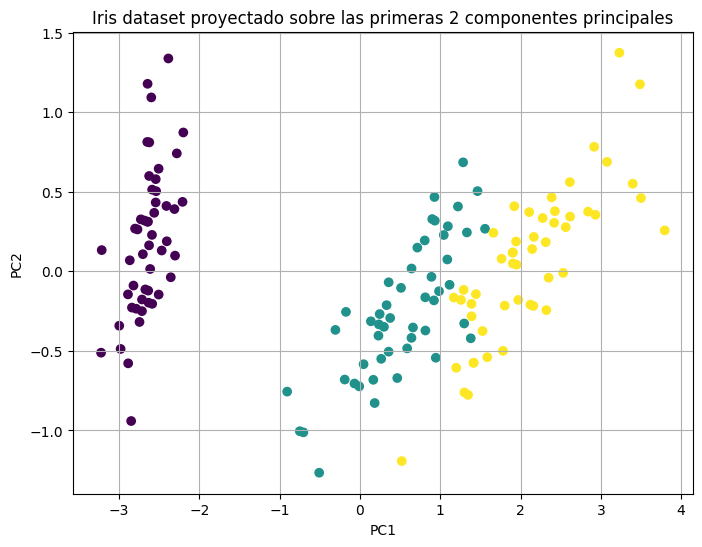

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar un dataset clásico
data = load_iris()
X = data.data
y = data.target

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Varianza explicada
print("Varianza explicada:", pca.explained_variance_ratio_)

# Visualizar
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris dataset proyectado sobre las primeras 2 componentes principales')
plt.grid(True)
plt.show()


In [2]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

## Aplicaciones típicas

 |Aplicación                   | Descripción                                                |
| ---------------------------- | ---------------------------------------------------------- |
| Reducción de dimensionalidad | Captura la estructura esencial con menos variables         |
| Visualización de datos       | Proyecta datos de alta dimensión en 2D o 3D                |
| Compresión                   | Permite representar datos con menos información            |
| Ruido                        | Al eliminar componentes con poca varianza, se filtra ruido |
| Preprocesamiento             | Suele usarse antes de clustering o regresión               |


## PCA y reducción de dimensión

Sea $ X = U \Sigma V^T $ la SVD de la matriz centrada.

Si solo conservas los primeros $ r $ valores singulares:

$$ X_r = U_r \Sigma_r V_r^T $$

---

Entonces
- Los datos proyectados son  
  $$ Z_r = XV_r \in \mathbb{R}^{n \times r} $$
- Estos datos viven en un subespacio de dimensión $ r $ dentro de $ \mathbb{R}^p $

De este modo, PCA permite representar los datos originales con solo $ r $ variables derivadas, llamadas componentes principales, que están decorrelacionadas y ordenadas según su importancia.